<a href="https://colab.research.google.com/github/KOMPALALOKESH/project-practice/blob/main/Capstone_project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# pd.set_option('display.max_rows',None)
# pd.set_option('display.max_columns',None)

# ***EDA analysis***

In [121]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [122]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [123]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [124]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [125]:
df.info() # memory usage of data frame is 5.7MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [126]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [127]:
df.isnull().sum() # no null values in data

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [128]:
# average bill amount of all months given in the data
tot_bill_amt = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']
tot_bill_amt[:10]

0       7704.0
1      17077.0
2     101653.0
3     231334.0
4     109339.0
5     238114.0
6    2724595.0
7      13486.0
8      65212.0
9      26919.0
dtype: float64

In [129]:
tot_bill_amt.mean().round(3),tot_bill_amt.max().round(3)

(269861.671, 5263883.0)

# ***Data Visualization***

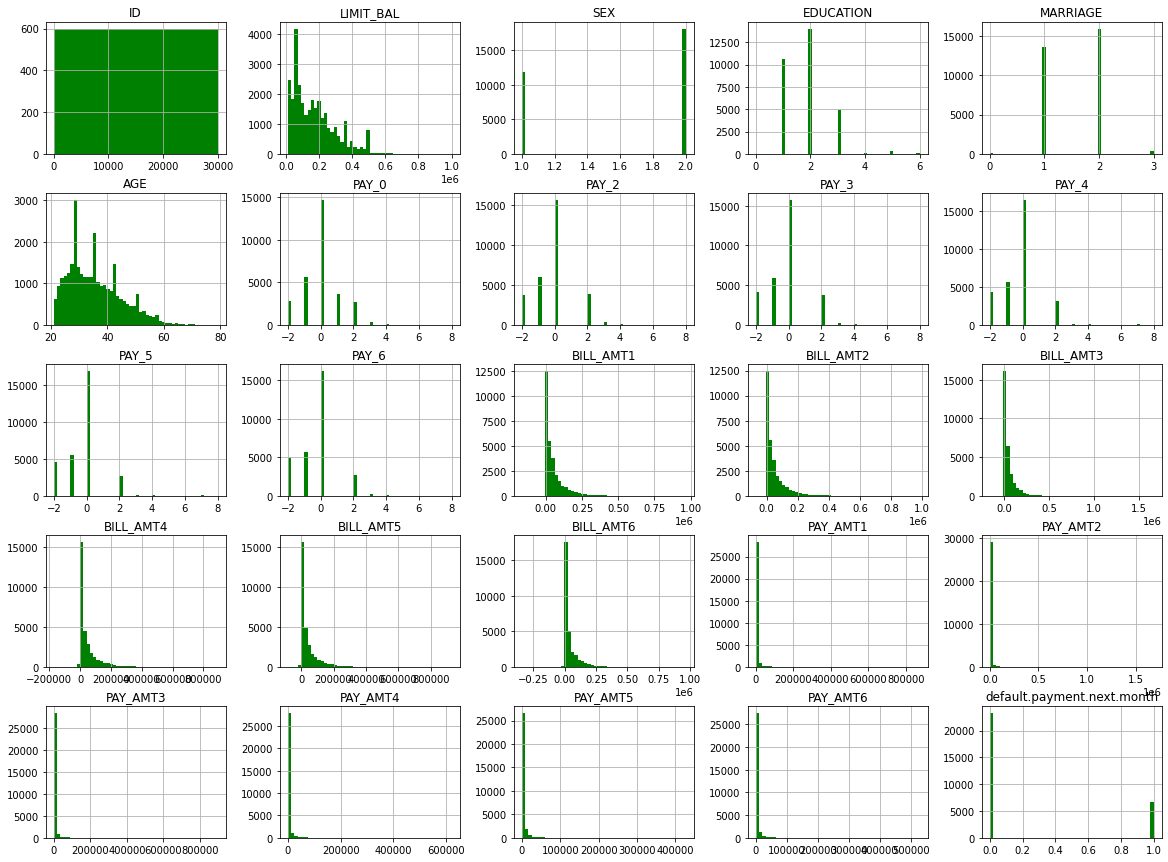

In [130]:
df.hist(bins=50,figsize=(20,15),color='green')
plt.show()

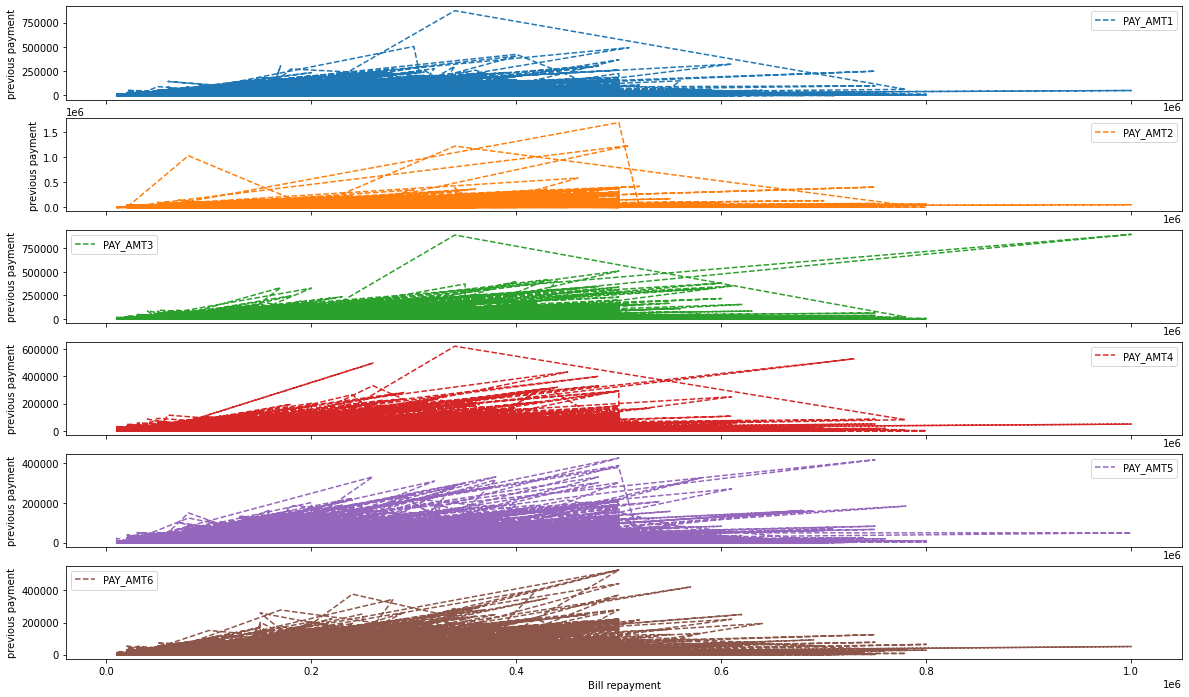

In [131]:
df.plot(x='LIMIT_BAL',
             y=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],figsize=(20,12),
        linestyle='--',xlabel='Bill repayment',ylabel='previous payment',subplots=True)
plt.legend(loc='upper left')
plt.show()

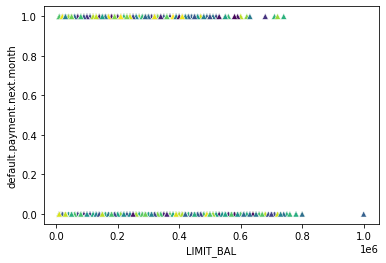

In [132]:
import seaborn as sns
sns.scatterplot(data=df,x='LIMIT_BAL',y='default.payment.next.month',marker='^',
                alpha=1,c=np.random.rand(len(df['LIMIT_BAL'])),hue_order='SEX')
plt.show()

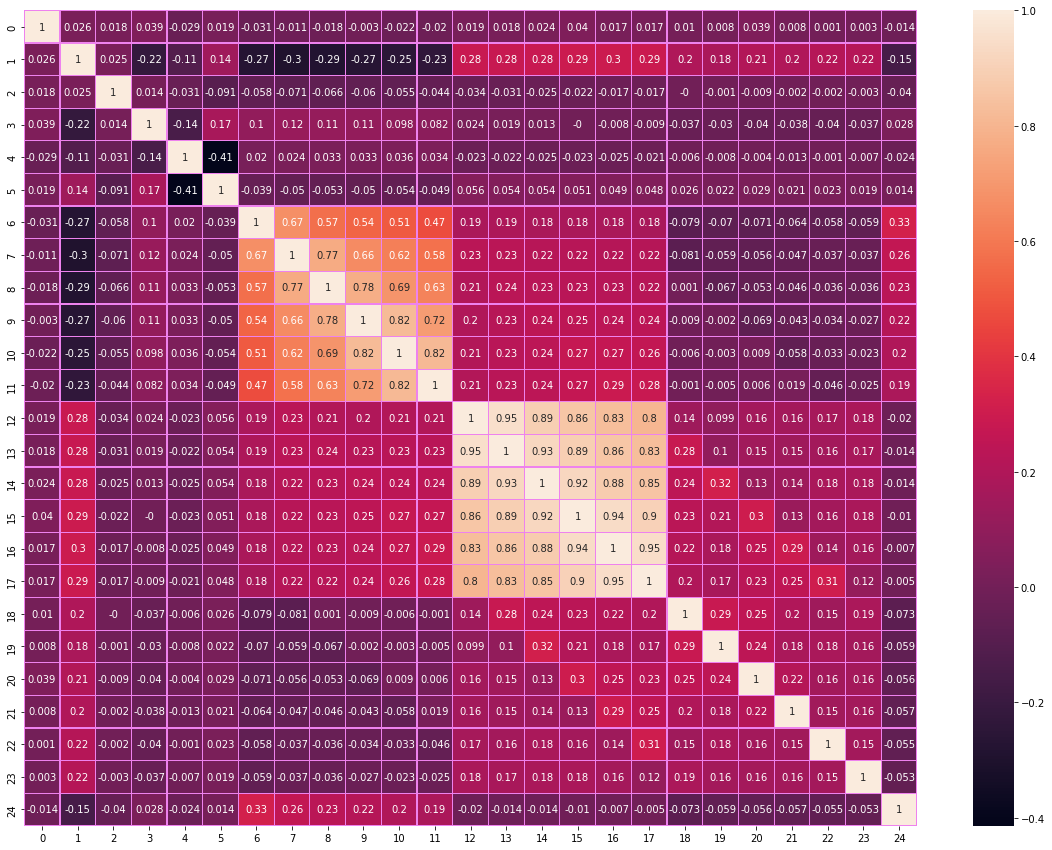

In [133]:
correlation = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation.values.round(3),annot=True,linewidth=0.2,linecolor='violet')
plt.show()

# ***Training and Testing***

In [134]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
X = df[['SEX','EDUCATION','MARRIAGE']]
y = df['default.payment.next.month']
df = df.drop(['ID','SEX','EDUCATION','MARRIAGE','default.payment.next.month'],axis=1)

In [135]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

In [136]:
X = pd.DataFrame(X)

In [137]:
X = pd.concat([X,df],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [138]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [139]:
print(X_train.columns.values)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

[0 1 2 3 4 5 6 7 8 9 10 11 12 'LIMIT_BAL' 'AGE' 'PAY_0' 'PAY_2' 'PAY_3'
 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6']


((22500, 33), (7500, 33), (22500,), (7500,))

## ***XGB Regressor***

In [140]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier()

In [141]:
xgb_model.score(X_train,y_train).round(3)

0.825

In [142]:
y_predict = xgb_model.predict(X_test)
y_predict,y_test

(array([0, 0, 0, ..., 0, 0, 0]), 2644     1
 850      0
 23052    1
 18152    0
 11237    0
         ..
 18432    0
 26310    0
 3581     0
 5613     0
 10003    0
 Name: default.payment.next.month, Length: 7500, dtype: int64)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5822
           1       0.67      0.39      0.49      1678

    accuracy                           0.82      7500
   macro avg       0.76      0.67      0.69      7500
weighted avg       0.81      0.82      0.80      7500

[[5509  313]
 [1029  649]]


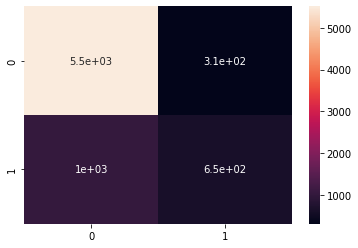

In [143]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

## ***Logistic Regressor***

In [144]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=1000)

In [145]:
y_predict = model_LR.predict(X_test)
y_predict

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [146]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5822
           1       0.00      0.00      0.00      1678

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.78      0.68      7500



[[5821    1]
 [1678    0]]


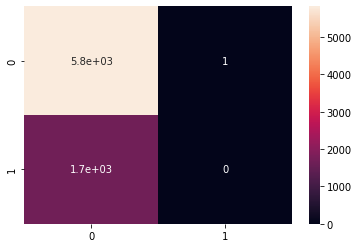

In [147]:
print(confusion_matrix(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

## ***SVM***

In [148]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm = LinearSVC()
model_svm = CalibratedClassifierCV()
model_svm.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge,

CalibratedClassifierCV()

In [149]:
y_predict = model_svm.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

In [150]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5822
           1       0.00      0.00      0.00      1678

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.78      0.68      7500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[5822    0]
 [1678    0]]


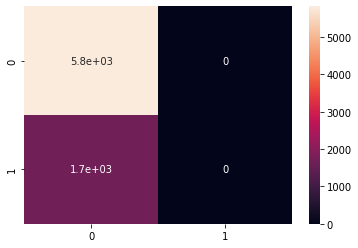

In [151]:
print(confusion_matrix(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

## ***RandomForestClassifier***

In [152]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

In [153]:
model_RF.feature_importances_ # fraction of varaibles affected

array([8.81908677e-03, 8.58510107e-03, 1.72439276e-05, 8.48400145e-03,
       9.72771443e-03, 7.63861204e-03, 3.57907798e-04, 9.88148127e-04,
       4.07609349e-04, 3.49258851e-04, 8.92685649e-03, 8.43687538e-03,
       1.80124243e-03, 5.92787290e-02, 6.36784576e-02, 9.80210164e-02,
       3.30824514e-02, 3.15882370e-02, 2.63835525e-02, 2.31407365e-02,
       1.80868610e-02, 5.88075187e-02, 5.27774082e-02, 5.08698102e-02,
       4.92514275e-02, 4.88230697e-02, 4.84741181e-02, 5.04595386e-02,
       4.64422952e-02, 4.56335170e-02, 4.26215756e-02, 4.24735804e-02,
       4.55664413e-02])

In [154]:
feature_importances = pd.DataFrame({'fraction of varaibles affected':model_RF.feature_importances_},index=X_train.columns)
feature_importances

,fraction of varaibles affected
0,0.008819
1,0.008585
2,0.000017
3,0.008484
4,0.009728
5,0.007639
6,0.000358
7,0.000988
8,0.000408
9,0.000349


In [155]:
feature_importances = feature_importances.sort_values(by='fraction of varaibles affected')

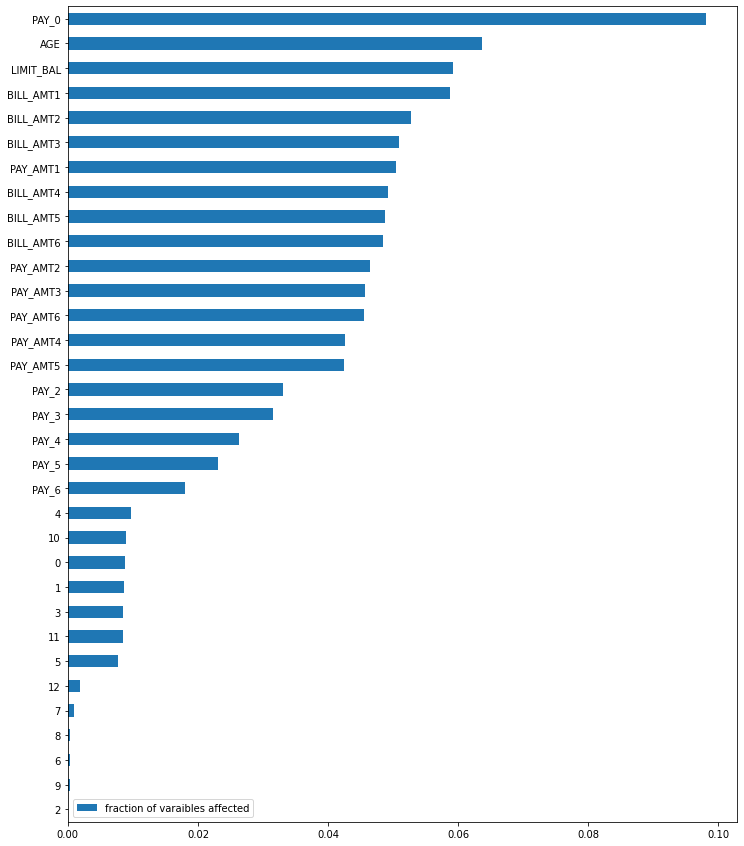

In [156]:
feature_importances.plot(kind='barh',figsize=(12,15))
plt.show()

In [157]:
y_predict = model_RF.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [158]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5822
           1       0.66      0.39      0.49      1678

    accuracy                           0.82      7500
   macro avg       0.75      0.67      0.69      7500
weighted avg       0.80      0.82      0.80      7500



[[5484  338]
 [1020  658]]


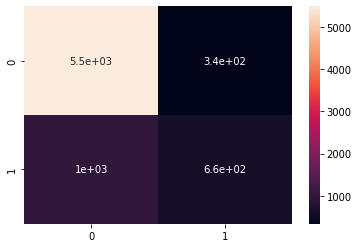

In [159]:
print(confusion_matrix(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

## ***KNN Classifier***

In [160]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier()

In [161]:
y_predict = model_knn.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [162]:
print(confusion_matrix(y_test,y_predict))

[[5337  485]
 [1381  297]]


[[5337  485]
 [1381  297]]


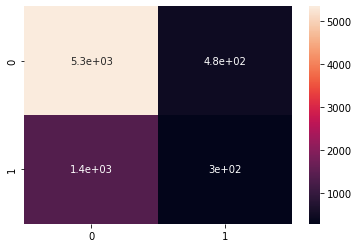

In [163]:
print(confusion_matrix(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

## ***Guassian Classifier***

In [164]:
from sklearn.naive_bayes import GaussianNB

model_gauss = GaussianNB()
model_gauss.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

In [165]:
y_predict = model_gauss.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [166]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.23      0.36      5822
           1       0.25      0.90      0.39      1678

    accuracy                           0.38      7500
   macro avg       0.57      0.56      0.38      7500
weighted avg       0.74      0.38      0.37      7500



[[1317 4505]
 [ 171 1507]]


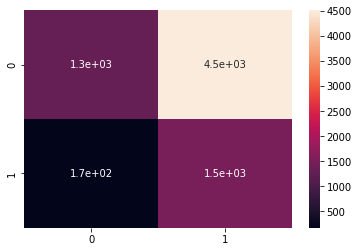

In [167]:
print(confusion_matrix(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

# ***Comparing model performances***

In [168]:
from sklearn.metrics import roc_curve

fpr0,tpr0,th0 = roc_curve(y_test,xgb_model.predict_proba(X_test)[:,1],pos_label=1)
fpr2,tpr2,th2 = roc_curve(y_test,model_LR.predict_proba(X_test)[:,1],pos_label=1)
fpr3,tpr3,th3 = roc_curve(y_test,model_RF.predict_proba(X_test)[:,1],pos_label=1)
fpr4,tpr4,th4 = roc_curve(y_test,model_knn.predict_proba(X_test)[:,1],pos_label=1)
fpr5,tpr5,th5 = roc_curve(y_test,model_svm.predict_proba(X_test)[:,1],pos_label=1)
fpr6,tpr6,th6 = roc_curve(y_test,model_gauss.predict_proba(X_test)[:,1],pos_label=1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

In [169]:
from sklearn.metrics import roc_auc_score

roc_auc_score0 = roc_auc_score(y_test,xgb_model.predict_proba(X_test)[:,1]).round(3)
roc_auc_score1 = roc_auc_score(y_test,model_LR.predict_proba(X_test)[:,1]).round(3)
roc_auc_score2 = roc_auc_score(y_test,model_RF.predict_proba(X_test)[:,1]).round(3)
roc_auc_score3 = roc_auc_score(y_test,model_svm.predict_proba(X_test)[:,1]).round(3)
roc_auc_score4 = roc_auc_score(y_test,model_knn.predict_proba(X_test)[:,1]).round(3)
roc_auc_score5 = roc_auc_score(y_test,model_gauss.predict_proba(X_test)[:,1]).round(3)
print("xgb classifier",roc_auc_score0)
print("Logistic Regression",roc_auc_score1)
print("Random forest classifier",roc_auc_score2)
print("support vector machine classifier",roc_auc_score3)
print("kneighbors classifier",roc_auc_score4)
print("gaussian classifier",roc_auc_score5)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

xgb classifier 0.791
Logistic Regression 0.645
Random forest classifier 0.772
support vector machine classifier 0.622
kneighbors classifier 0.602
gaussian classifier 0.676


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


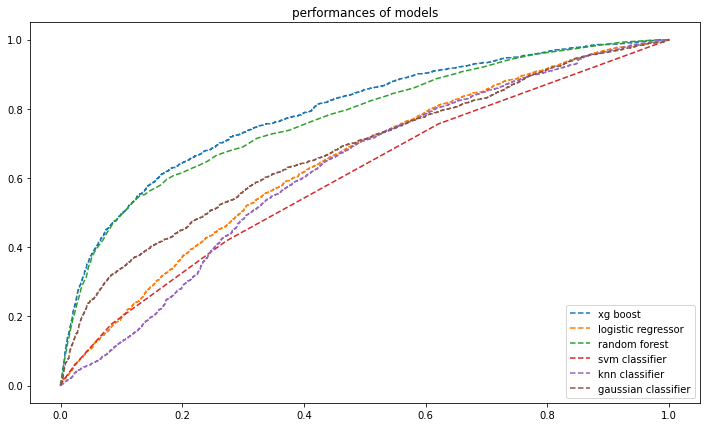

In [170]:
plt.figure(figsize=(12,7))
plt.plot(fpr0,tpr0,linestyle='--',label='xg boost')
plt.plot(fpr2,tpr2,linestyle='--',label='logistic regressor')
plt.plot(fpr3,tpr3,linestyle='--',label='random forest')
plt.plot(fpr4,tpr4,linestyle='--',label='svm classifier')
plt.plot(fpr5,tpr5,linestyle='--',label='knn classifier')
plt.plot(fpr6,tpr6,linestyle='--',label='gaussian classifier')

plt.legend(loc='lower right')
plt.title('performances of models')
plt.show()